In [54]:
import numpy as np
import pandas as pd

import utils
from sklearn.metrics.pairwise import paired_distances
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn.objects as so



In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotnine as pn

from sklearn.metrics.pairwise import cosine_similarity, paired_distances
from sklearn.preprocessing import StandardScaler, scale
from scipy.spatial import distance

from einops import rearrange, reduce, repeat


In [56]:
import importlib
importlib.reload(utils)


<module 'utils' from '/home/acercyc/Project/Keio Testing_analysis/src/utils.py'>

In [57]:
fn = utils.path_data / 'ana_one_dot_predicting_individual_beh_profile/prediction.csv'
df = pd.read_csv(fn)

In [58]:
df.head()

,participant,trial no.,actual control,angular bias,response,group,dist_mean,dist_sd,v_mean,v_sd,...,b1,b2,b0,response_pred_stdz,b1_stdz,b2_stdz,b0_stdz,response_pred_p_only,b1_stdz_p_only,b0_stdz_p_only
0,K-Reg-H-10,1,0.30,0,0,H,0.637205,0.104790,0.167450,0.053875,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227
1,K-Reg-H-10,2,0.80,0,1,H,0.161334,0.040062,0.074640,0.066949,...,-3.230715,-0.339573,1.976842,1,-2.694824,0.616395,-0.634225,1,-3.258059,1.941227
2,K-Reg-H-10,3,0.30,0,0,H,0.677331,0.146095,0.194376,0.061812,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227
3,K-Reg-H-10,4,0.55,90,0,H,0.897086,0.210970,0.184965,0.064054,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227
4,K-Reg-H-10,5,0.30,90,0,H,0.949337,0.145878,0.229553,0.051487,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227


In [59]:
predVar = 'response_pred_stdz'
df_ = df.copy()
df_ = df_.melt(['participant', 'actual control', 'angular bias', 'group'], ['response', predVar], 
               var_name='response_type', value_name='response')
df_ = df_.groupby(['participant', 'actual control', 'angular bias', 'group', 'response_type']).mean()
df_ = df_.reset_index()
df_.head()

/tmp/ipykernel_64154/1305714369.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


,participant,actual control,angular bias,group,response_type,response
0,K-Reg-H-10,0.30,0,H,response,0.1
1,K-Reg-H-10,0.30,0,H,response_pred_stdz,0.0
2,K-Reg-H-10,0.30,90,H,response,0.0
3,K-Reg-H-10,0.30,90,H,response_pred_stdz,0.0
4,K-Reg-H-10,0.55,0,H,response,1.0


In [60]:
# df_ = df_[['participant', 'actual control', 'angular bias', 'response_pred', 'group']]
# df_ = df_.groupby(['participant', 'actual control', 'angular bias', 'group']).mean()
# df_ = df_.reset_index()

# grid = sns.FacetGrid(col='participant', col_wrap=5, data=df_)
# grid.map_dataframe(sns.pointplot, 
#                    x='actual control', 
#                    y='response_pred', 
#                    hue='angular bias')
# grid.add_legend()


# plt.figure()
# sns.catplot(x='actual control', y='response_pred', hue='angular bias', data=df_, col='group', kind='point')

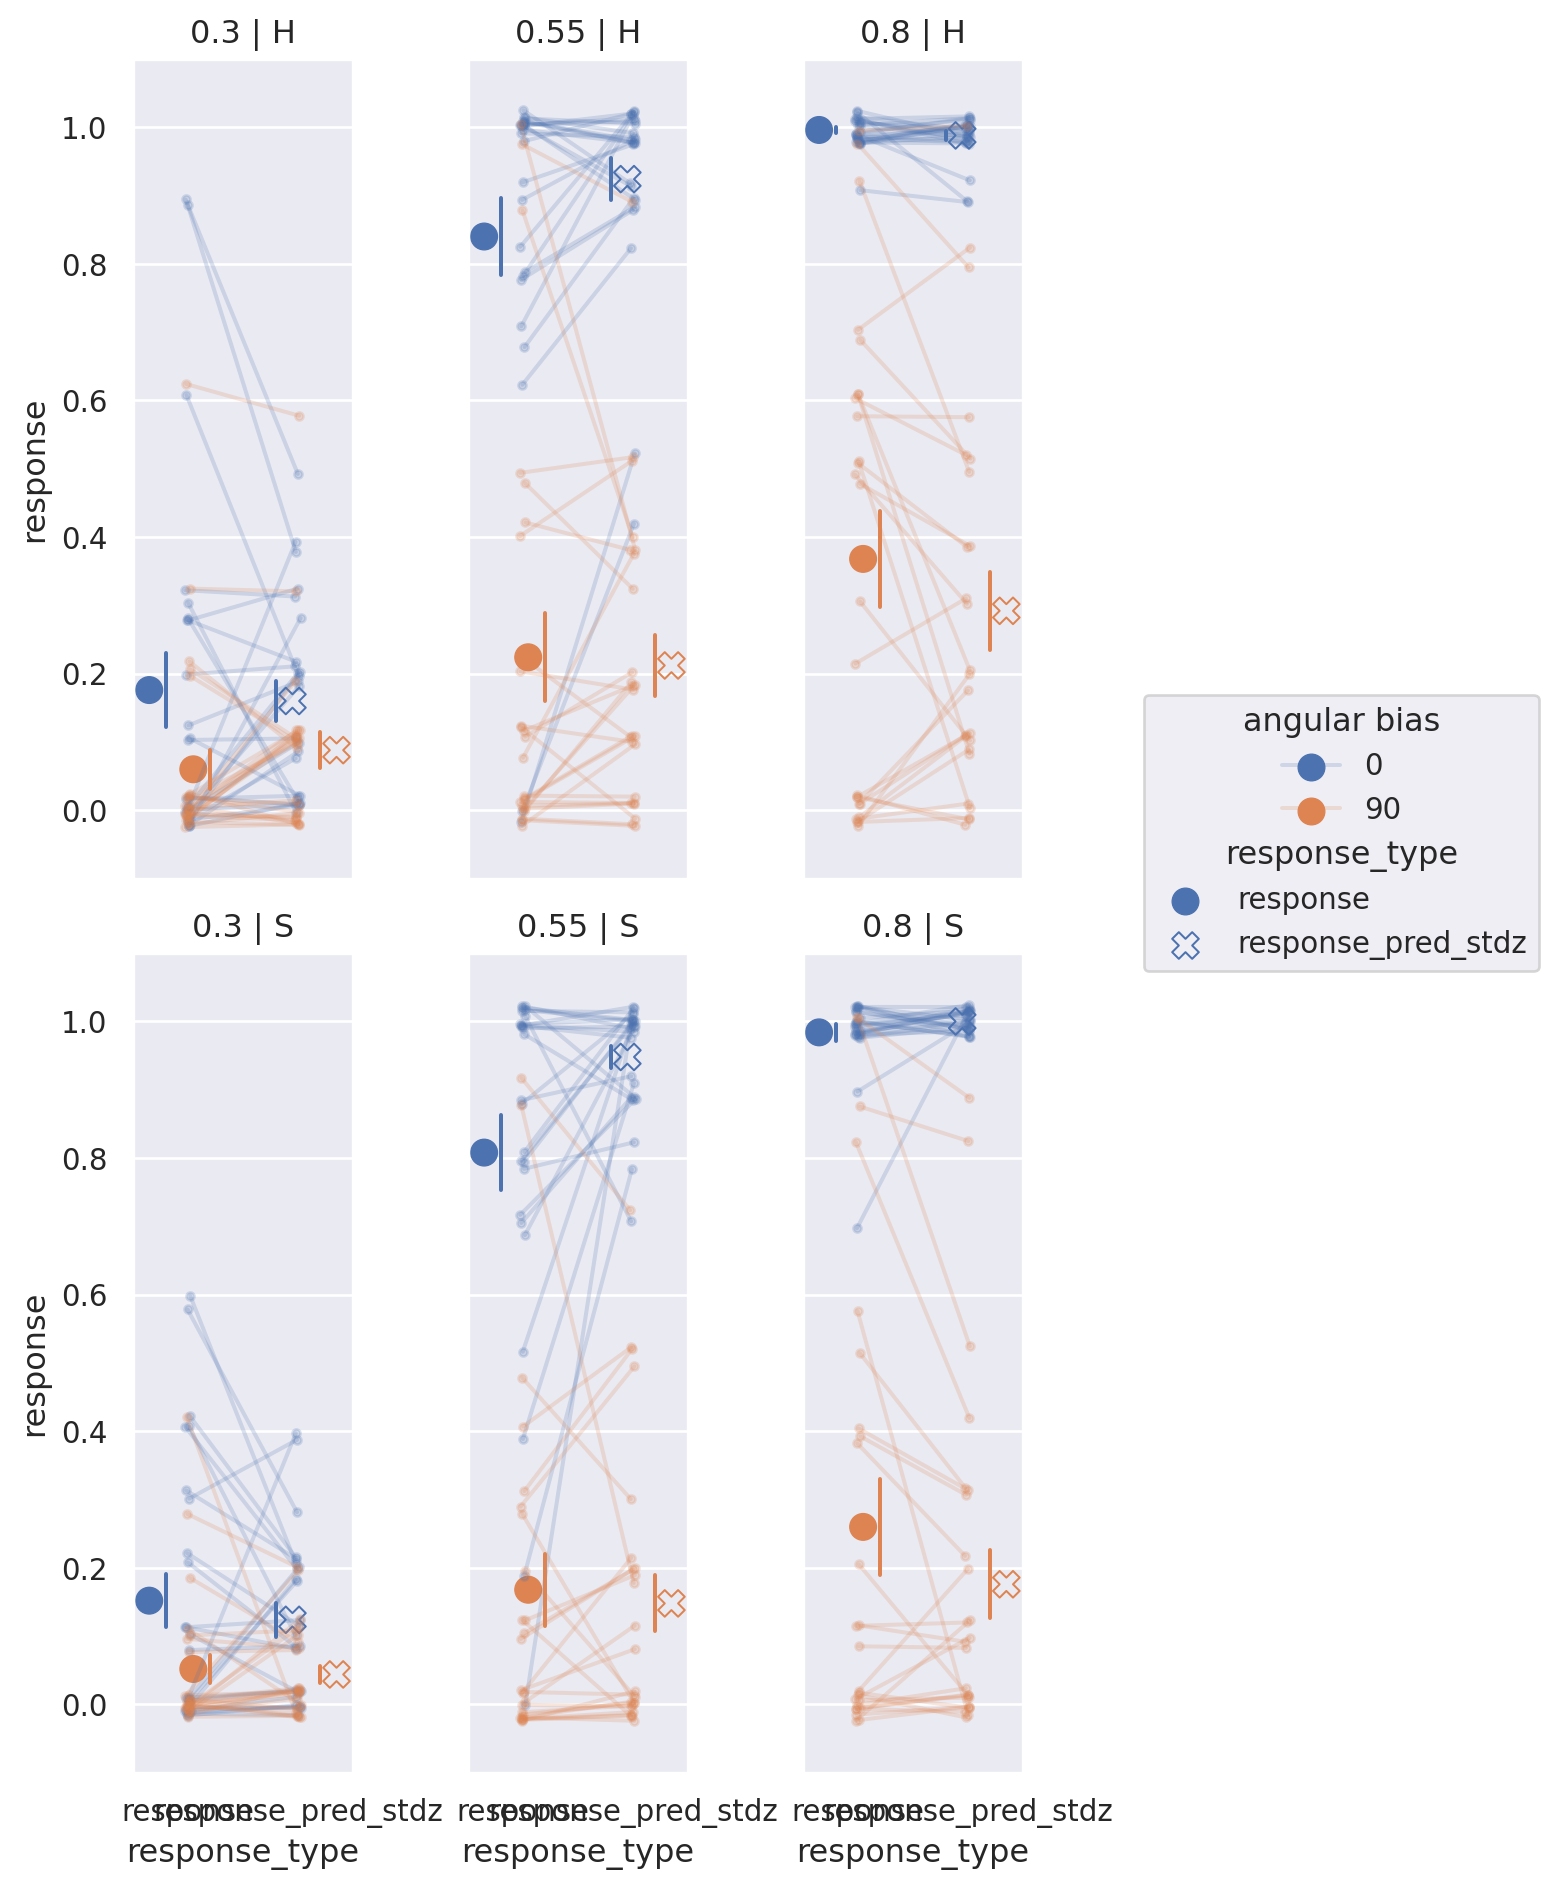

In [61]:
# f = plt.figure(figsize=(10, 5))
# df_['angular bias'] = pd.Categorical(df_['angular bias'])
df_['angular bias'] = df_['angular bias'].astype('str')
df_['actual control'] = df_['actual control'].astype('str')

gap = 0.1
byVar = ['response', 'actual control', 'angular bias', 'response_type']

g = (
    so.Plot(df_, x='response_type', y='response', color='angular bias')
    # .add(so.Dots(alpha=0.2), so.Jitter(x=.05, y=.05))
    # .pair(x=["actual control", 'angular bias'])
    # .facet(row="group")    
    .add(so.Line(alpha=0.2, marker='.'), so.Agg(),  so.Jitter(x=.05, y=.05), group="participant")
    # .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Dot(pointsize=10), so.Agg(), so.Dodge(), marker='response_type', fill='response_type')
    .add(so.Range(), so.Est(errorbar="se"), so.Dodge())
    .facet(row="group", col='actual control')
    .layout(size=(6, 10))
    .limit(y=(-0.1, 1.1))
    # .on(f)
  
)
g
# print(g)
# fn = utils.Save.savepath('report_three_dot_prediction_group', 'real_pred_group_performce.pdf')
# g.save(fn)


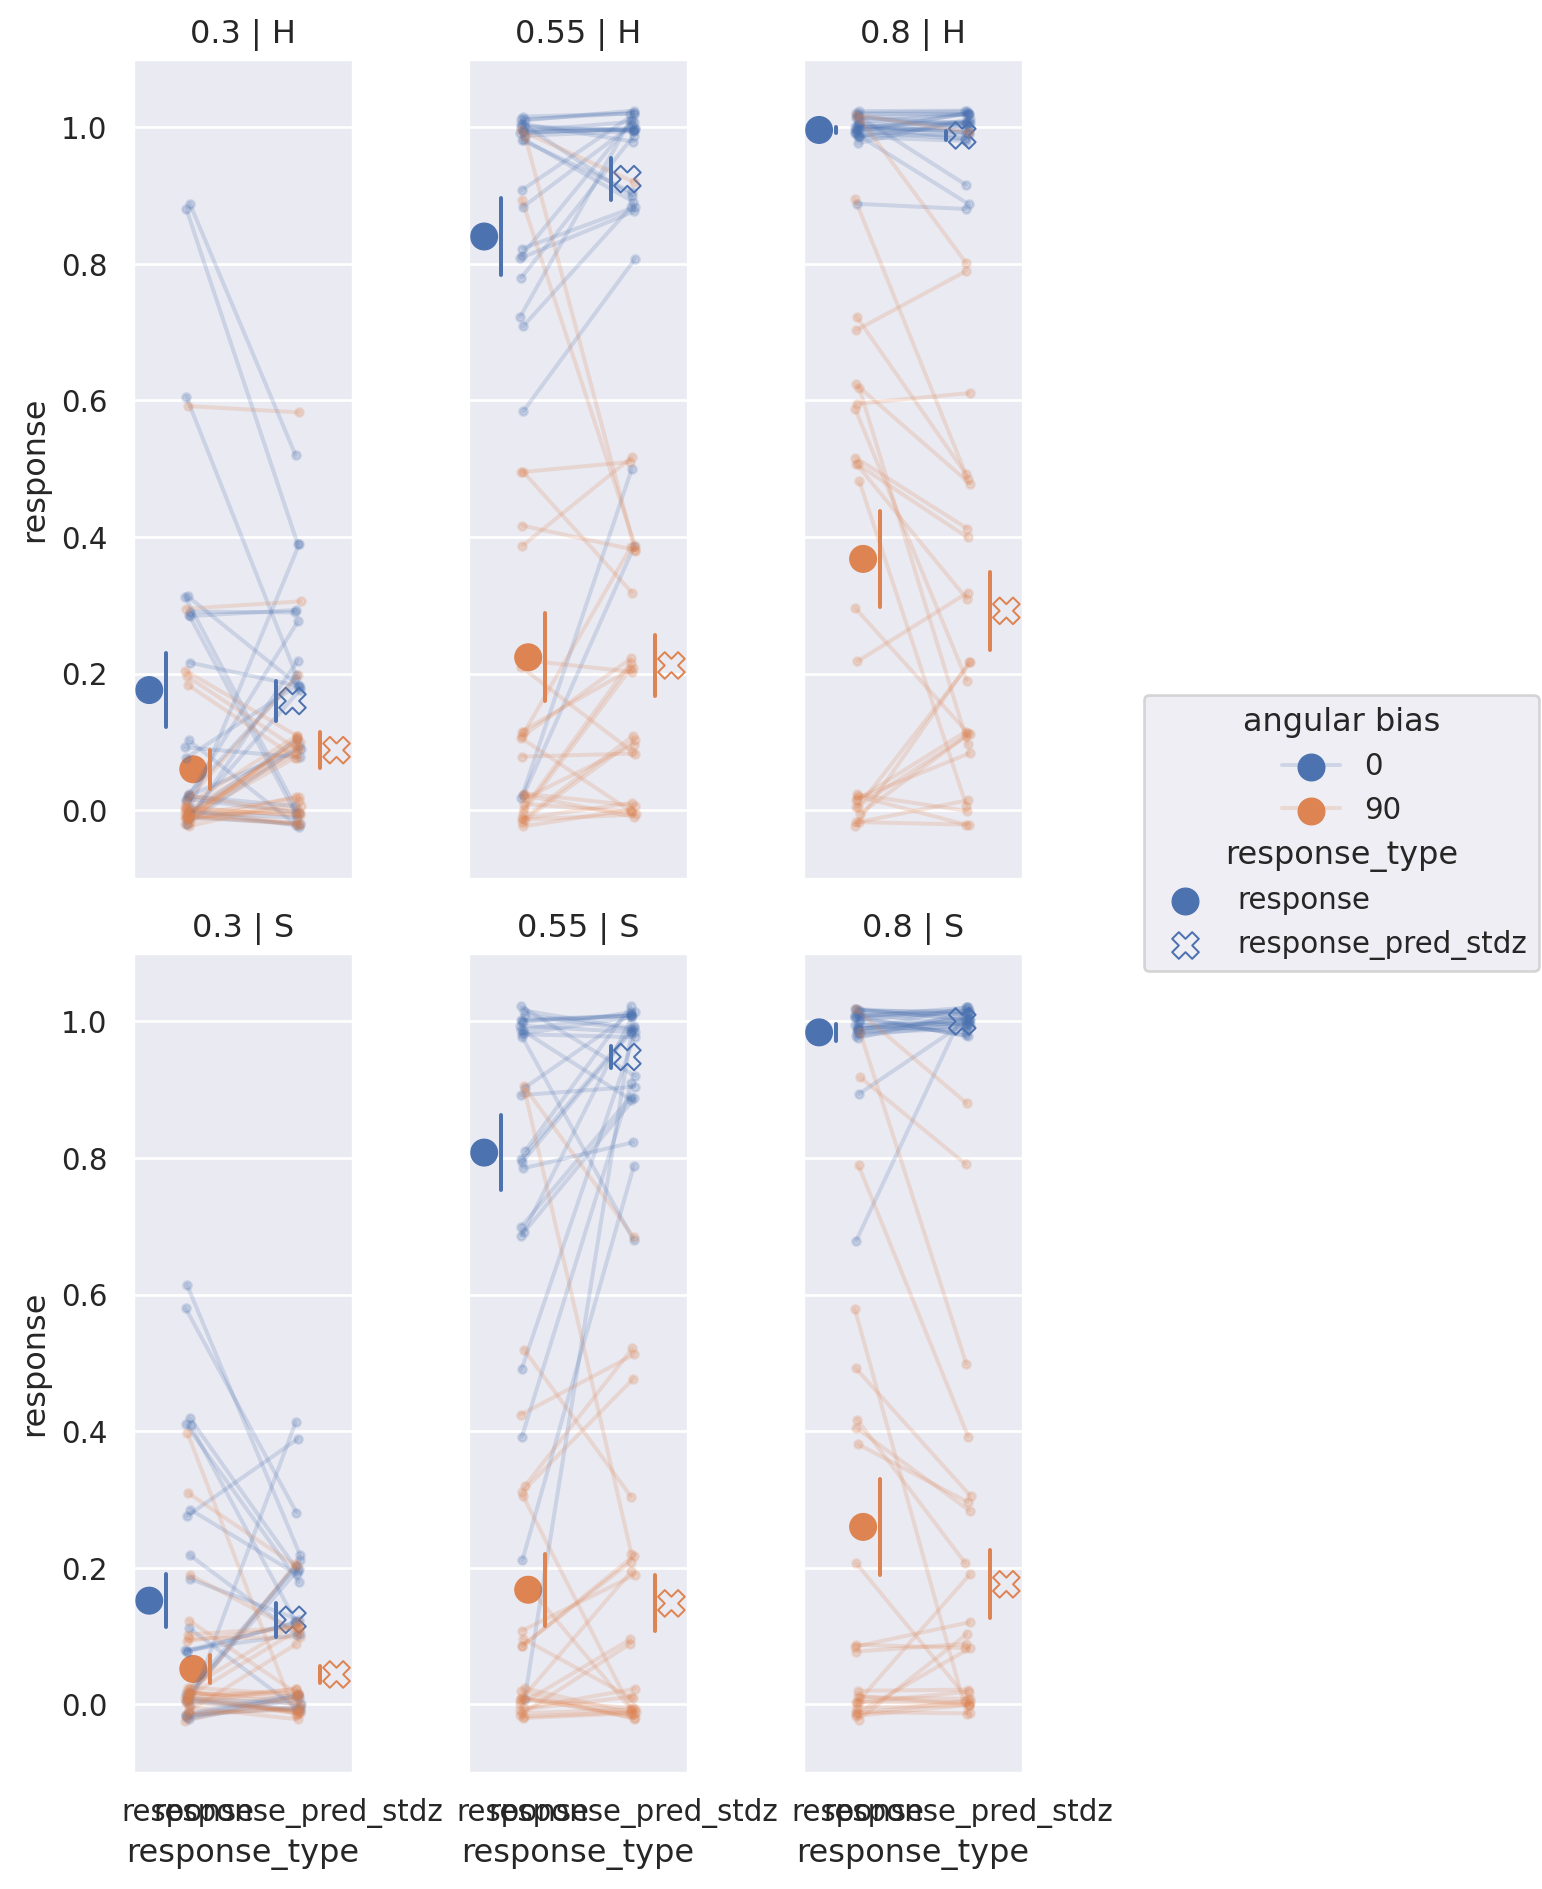

In [62]:
# print(g)
fn = utils.Save.savepath('report_one_dot_predicting_group', 'real_pred_group_performce.pdf')
g.save(fn)


In [63]:
predVar = 'response_pred_stdz'
df_ = df.copy()
# df_ = df_.melt(['participant', 'actual control', 'angular bias', 'group'], ['response', predVar], 
#                var_name='response_type', value_name='response')
df_ = df_.groupby(['participant', 'actual control', 'angular bias', 'group']).mean()
df_ = df_.reset_index()
df_.head()

,participant,actual control,angular bias,group,trial no.,response,dist_mean,dist_sd,v_mean,v_sd,...,b1,b2,b0,response_pred_stdz,b1_stdz,b2_stdz,b0_stdz,response_pred_p_only,b1_stdz_p_only,b0_stdz_p_only
0,K-Reg-H-10,0.30,0,H,24.4,0.1,0.789420,0.183825,0.207674,0.070567,...,-3.230715,-0.339573,1.976842,0.0,-2.694824,0.616395,-0.634225,0.0,-3.258059,1.941227
1,K-Reg-H-10,0.30,90,H,30.0,0.0,0.912961,0.197374,0.219058,0.069594,...,-3.230715,-0.339573,1.976842,0.0,-2.694824,0.616395,-0.634225,0.0,-3.258059,1.941227
2,K-Reg-H-10,0.55,0,H,37.1,1.0,0.447812,0.122060,0.137169,0.058623,...,-3.230715,-0.339573,1.976842,1.0,-2.694824,0.616395,-0.634225,0.9,-3.258059,1.941227
3,K-Reg-H-10,0.55,90,H,28.8,0.0,0.832833,0.182092,0.175069,0.060175,...,-3.230715,-0.339573,1.976842,0.2,-2.694824,0.616395,-0.634225,0.2,-3.258059,1.941227
4,K-Reg-H-10,0.80,0,H,29.6,1.0,0.215066,0.060492,0.087633,0.061230,...,-3.230715,-0.339573,1.976842,1.0,-2.694824,0.616395,-0.634225,1.0,-3.258059,1.941227


In [64]:
df_count = df_.value_counts(['group', 'response', predVar])
# df_count.columns = ['count']
df_count = df_count.reset_index()
df_count = df_count.sort_values(by='group')

df_count.rename(columns={0:'Frequency'}, inplace=True)

# scaling 
df_count['Frequency'] = (df_count['Frequency'])**(1/2)

Text(40.458135416666664, 0.5, 'Predicted response')

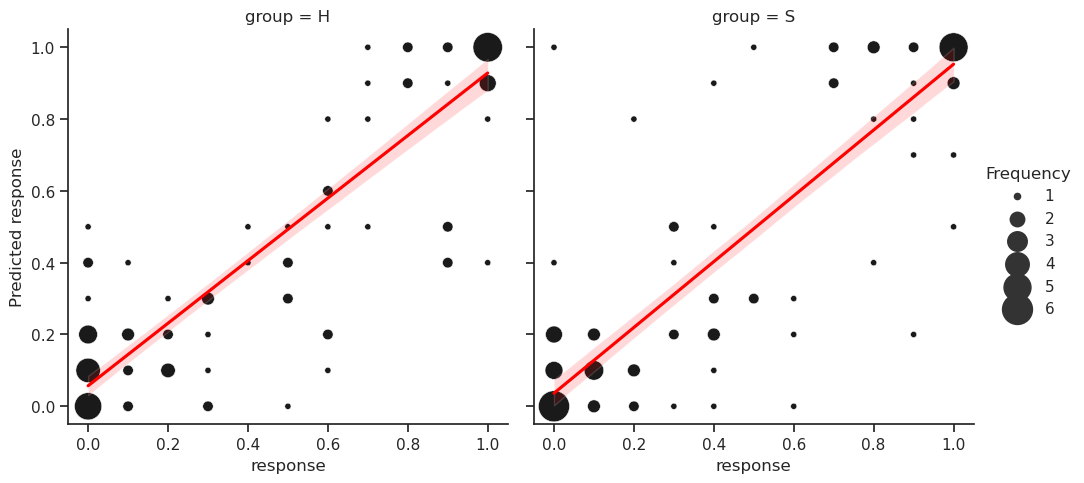

In [66]:

g = sns.relplot(data=df_count, x='response', y=predVar, 
                size='Frequency', color='k',
                sizes=(20, 500), col='group', height=5)
ax = g.figure.get_axes()
sns.regplot(data=df_.query('group=="H"'), x='response', y=predVar, color='red', scatter=False, ax=ax[0])
sns.regplot(data=df_.query('group=="S"'), x='response', y=predVar, color='red', scatter=False, ax=ax[1])
ax[0].set_ylabel('Predicted response')

In [35]:


# g = sns.relplot(data=df_count, x='response', y='response_pred_p_only', 
#                 size='Frequency', color='k',
#                 sizes=(20, 500), col='group', height=5)
# g.map(sns.regplot, 'response', 'response_pred_p_only', color='red', scatter=False)
# g.set_axis_labels('Groud true response', 'Predicted response')


In [36]:
fn = utils.Save.savepath('report_one_dot_predicting_group', 'correlation.pdf')
g.savefig(fn)

In [37]:
import pingouin as pg   
df_.groupby(['group']).apply(lambda x: pg.corr(x['response'].values, x['response_pred_stdz'].values))

,,n,r,CI95%,p-val,BF10,power
group,,,,,,,
H,pearson,150,0.923198,"[0.9, 0.94]",2.429047e-63,4.516e+59,1.0
S,pearson,150,0.903196,"[0.87, 0.93]",3.145193e-56,4.44e+52,1.0


## Only use action plan position

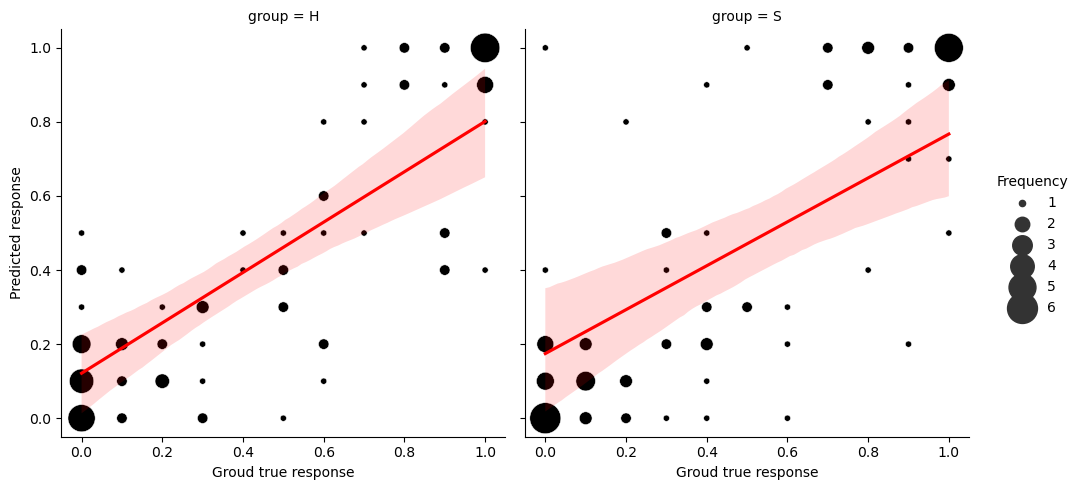

In [38]:
df_count = df_.value_counts(['group', 'response', 'response_pred_stdz'])
# df_count.columns = ['count']
df_count = df_count.reset_index()
df_count = df_count.sort_values(by='group')

df_count.rename(columns={0:'Frequency'}, inplace=True)

# scaling 
df_count['Frequency'] = (df_count['Frequency'])**(1/2)

g = sns.relplot(data=df_count, x='response', y='response_pred_stdz', 
                size='Frequency', color='k',
                sizes=(20, 500), col='group', height=5)
g.map(sns.regplot, 'response', 'response_pred_stdz', color='red', scatter=False)
g.set_axis_labels('Groud true response', 'Predicted response')


# Regression coefficients for the one dot predicting group

In [39]:
df.head()

,participant,trial no.,actual control,angular bias,response,group,dist_mean,dist_sd,v_mean,v_sd,...,b1,b2,b0,response_pred_stdz,b1_stdz,b2_stdz,b0_stdz,response_pred_p_only,b1_stdz_p_only,b0_stdz_p_only
0,K-Reg-H-10,1,0.30,0,0,H,0.637205,0.104790,0.167450,0.053875,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227
1,K-Reg-H-10,2,0.80,0,1,H,0.161334,0.040062,0.074640,0.066949,...,-3.230715,-0.339573,1.976842,1,-2.694824,0.616395,-0.634225,1,-3.258059,1.941227
2,K-Reg-H-10,3,0.30,0,0,H,0.677331,0.146095,0.194376,0.061812,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227
3,K-Reg-H-10,4,0.55,90,0,H,0.897086,0.210970,0.184965,0.064054,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227
4,K-Reg-H-10,5,0.30,90,0,H,0.949337,0.145878,0.229553,0.051487,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227


,participant,group,b0,b1,b2
0,K-Reg-H-10,Health,1.976842,-3.230715,-0.339573
1,K-Reg-H-11,Health,2.412316,-3.034829,-0.309967
2,K-Reg-H-12,Health,0.982205,-3.189150,-0.627470
3,K-Reg-H-13,Health,1.267001,-3.030674,-0.374198
4,K-Reg-H-14,Health,2.434450,-3.543134,-0.406435


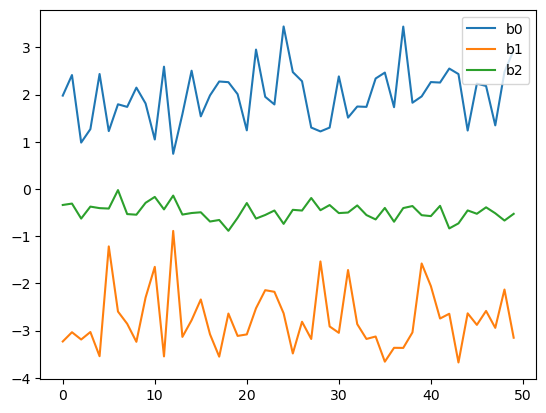

In [40]:
df_ = df[['participant', 'group', 'b0', 'b1', 'b2']].groupby(['participant', 'group']).mean()
df_ = df_.reset_index()
df_ = df_.replace({'group': {'H': 'Health', 'S': 'Patient'}})
df_.plot()
df_.head()



## b1

(-4.0, 0.0)

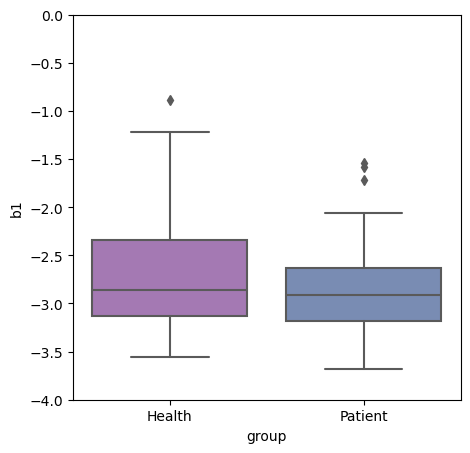

In [41]:

fig, ax = plt.subplots(figsize=(5, 5))
sns.set_theme(style='ticks')
sns.boxplot(data=df_, x="group", y="b1", palette=utils.Plot.palette_group)
# sns.despine(offset=10, trim=True)
# sns.set(ylim=(-5, 1))
plt.ylim(-4, 0)


In [42]:
fn = utils.Save.savepath('report_one_dot_predicting_group', 'b1.pdf')
fig.savefig(fn)

In [43]:
from pingouin import ttest
df_.groupby(['group']).apply(lambda x: ttest(x['b1'].values, 0))

,,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
group,,,,,,,,,
Health,T-test,-19.628858,24,two-sided,2.738630e-16,"[-2.99, -2.42]",3.925772,1.856e+13,1.0
Patient,T-test,-23.422743,24,two-sided,4.830295e-18,"[-3.06, -2.56]",4.684549,8.744e+14,1.0


In [44]:
# ttest between groups
g1 = df_[df_['group'] == 'Health']['b1'].values
g2 = df_[df_['group'] == 'Patient']['b1'].values
ttest(g1, g2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.609086,48,two-sided,0.54534,"[-0.26, 0.48]",0.172275,0.329,0.091724


## b2

<AxesSubplot: xlabel='group', ylabel='b2'>

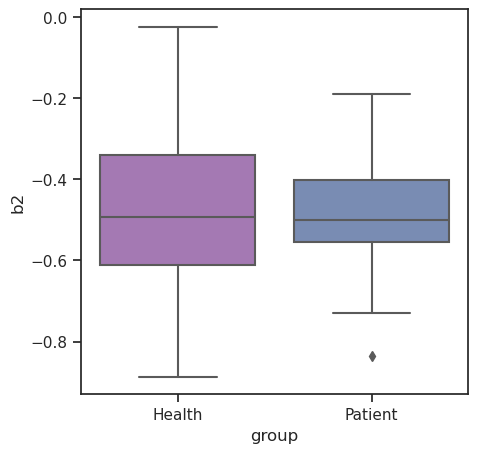

In [45]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.set_theme(style='ticks')
sns.boxplot(data=df_, x="group", y="b2", palette=utils.Plot.palette_group)

In [46]:
fn = utils.Save.savepath('report_one_dot_predicting_group', 'b2.pdf')
fig.savefig(fn)

In [47]:
from pingouin import ttest
df_.groupby(['group']).apply(lambda x: ttest(x['b2'].values, 0))

,,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
group,,,,,,,,,
Health,T-test,-11.790510,24,two-sided,1.798133e-11,"[-0.55, -0.39]",2.358102,4.924e+08,1.0
Patient,T-test,-17.424023,24,two-sided,3.990107e-15,"[-0.56, -0.44]",3.484805,1.446e+12,1.0


In [48]:
# ttest between groups
g1 = df_[df_['group'] == 'Health']['b2'].values
g2 = df_[df_['group'] == 'Patient']['b2'].values
ttest(g1, g2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.624652,48,two-sided,0.535158,"[-0.07, 0.13]",0.176678,0.332,0.093926
